# Sentiment Analysis on Amazon Reviews Dataset

### Overview:
- This project analyzes customer reviews from Amazon using basic sentiment analysis.
- We will:
  - Download the dataset using the **Kaggle API**.
  - Use **NLTK** for sentiment analysis.
  - Visualize the results using **Matplotlib** and **Seaborn**.

### Tools and Libraries Used:
- Python Libraries: `pandas`, `numpy`, `matplotlib`, `seaborn`, `nltk`
- Dataset: Amazon Reviews (Downloaded from Kaggle)
- Kaggle API for dataset handling.

## 1) Importing Libraries

In [16]:
# Basic libraries
import os
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# NLTK for sentiment analysis
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Kaggle API for dataset download
from kaggle.api.kaggle_api_extended import KaggleApi

# Filter unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## 2) Setting Up Kaggle API and Downloading the Dataset

In [17]:
api = KaggleApi()
api.authenticate()

download_path = "E:/CODING_OM/Jupyter Trial/Amazon Reviews Project/data"
dataset_name = "tarkkaanko/amazon"

if not os.path.exists(download_path):
    os.makedirs(download_path)

print("Downloading dataset...")
api.dataset_download_files(dataset_name, path=download_path, unzip=True)
print("Dataset downloaded and unzipped successfully!")

Dataset URL: https://www.kaggle.com/datasets/tarkkaanko/amazon
Dataset downloaded and unzipped successfully!


## 3) Data Loading and Exploration

In [18]:
# Load Dataset
file_path = "./data/amazon_reviews.csv"
df = pd.read_csv(file_path)

# Exploring
print("First 5 rows of the dataset:")
display(df.head())

print("\nDataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

First 5 rows of the dataset:


,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB

Missing Values:
Unnamed: 0              0
reviewerName            1
overall                 0
revie

## 4) Data Cleaning

In [19]:
print("Original dataset columns:", df.columns)

# Renaming columns for better readability
print("Renaming columns for better readability:")
df.columns = ['review_id', 'reviewer_name', 'review_score', 'review_text', 'review_time', 
              'day_diff', 'helpful_yes', 'helpful_no', 'total_vote', 
              'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound']

# Updated column names
print("New column names:", df.columns)

# Dropping rows with missing values in the 'review_text' and 'review_score' columns
print("Dropping missing values...")
df = df.dropna(subset=['review_text', 'review_score'])

# All the data is cleaned successfully!
print("Cleaned Data:")
display(df.head())

Original dataset columns: Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')
Renaming columns for better readability:
New column names: Index(['review_id', 'reviewer_name', 'review_score', 'review_text',
       'review_time', 'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')
Dropping missing values...
Cleaned Data:


,review_id,reviewer_name,review_score,review_text,review_time,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


## 5) Sentiment Analysis Using NLTK

In [20]:
# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment
def analyze_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] > 0:
        return "Positive"
    elif score['compound'] < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis
print("Analyzing sentiments...")
df['sentiment'] = df['review_text'].apply(analyze_sentiment)

# Display results
print("Sample Sentiments:")
display(df[['review_text', 'sentiment']].head(10))

Analyzing sentiments...
Sample Sentiments:


,review_text,sentiment
0,No issues.,Negative
1,"Purchased this for my device, it worked as adv...",Negative
2,it works as expected. I should have sprung for...,Negative
3,This think has worked out great.Had a diff. br...,Positive
4,"Bought it with Retail Packaging, arrived legit...",Positive
5,It's mini storage. It doesn't do anything els...,Neutral
6,I have it in my phone and it never skips a bea...,Positive
7,It's hard to believe how affordable digital ha...,Positive
8,Works in a HTC Rezound. Was running short of ...,Negative
9,"in my galaxy s4, super fast card, and am total...",Positive


## 6.1) Sentiment Distribution

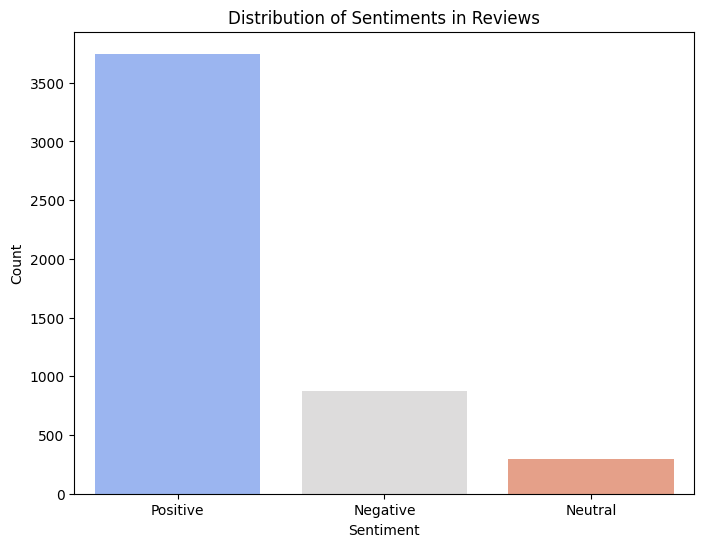

In [21]:
# Count of sentiments
sentiment_counts = df['sentiment'].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")
plt.title("Distribution of Sentiments in Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.savefig("sentiment_distribution.png")
plt.show()

## 6.2) Review Score vs Predicted Sentiment Distribution

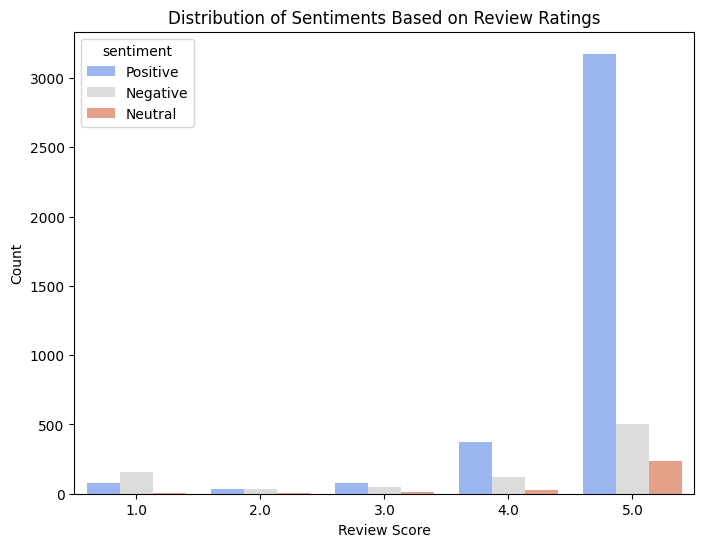

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='review_score', hue='sentiment', data=df, palette='coolwarm')
plt.title('Distribution of Sentiments Based on Review Ratings')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.savefig("Review Score vs Predicted Sentiment Distribution.png")
plt.show()

***** END *****

# Conclusions and Observations

1. **Sentiment Distribution**:
   - Most of the reviews are Positive, followed by Neutral and Negative.

2. **Sentiment vs Review Scores**:
   - Higher review scores (e.g., 4 and 5) tend to have more Positive sentiments.
   - Lower review scores (e.g., 1 and 2) are mostly Negative.

3. **Key Learning**:
   - This project demonstrates the use of Natural Language Processing (NLP) with `NLTK` and visualization with `Seaborn`.
   - Kaggle API was used to streamline dataset downloading and management.